In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
Hitters_Data = pd.read_csv("CapstoneProject/HitterData.csv")

In [3]:
Hitters_Data.head()

,Player,Year,Age,Team,Position,Games,AB,R,H,2B,...,SB %,BB,SO,BA,OBP,SLG,OPS,WAR,Salary,Adj Salary
0,Sandy Leon,2013,24,WSH,Catcher,2,1,0,0,0,...,0.0,0,1,0.000000,0.000,0.000,0.000,0.0,80327,100961
1,Sandy Leon,2014,25,WSH,Catcher,20,64,7,10,1,...,0.0,6,20,0.156250,0.229,0.219,0.448,0.1,243655,282122
2,Sandy Leon,2015,26,BOS,Catcher,41,114,8,21,2,...,0.0,7,28,0.184211,0.238,0.202,0.440,-0.3,393259,442126
3,Sandy Leon,2016,27,BOS,Catcher,78,252,36,78,17,...,0.0,23,66,0.309524,0.369,0.476,0.845,2.8,534000,554575
4,Sandy Leon,2017,28,BOS,Catcher,85,271,32,61,14,...,0.0,25,74,0.225092,0.290,0.354,0.644,0.7,1300000,1286637


In [4]:
Hitters_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 25 columns):
Player        1897 non-null object
Year          1897 non-null int64
Age           1897 non-null int64
Team          1897 non-null object
Position      1897 non-null object
Games         1897 non-null int64
AB            1897 non-null int64
R             1897 non-null int64
H             1897 non-null int64
2B            1897 non-null int64
3B            1897 non-null int64
HR            1897 non-null int64
RBI           1897 non-null int64
SB            1897 non-null int64
CS            1897 non-null int64
SB %          1897 non-null float64
BB            1897 non-null int64
SO            1897 non-null int64
BA            1897 non-null float64
OBP           1897 non-null float64
SLG           1897 non-null float64
OPS           1897 non-null float64
WAR           1897 non-null float64
Salary        1897 non-null int64
Adj Salary    1897 non-null int64
dtypes: float64(6), int64(16

In [5]:
Hitters_Data.corr()

,Year,Age,Games,AB,R,H,2B,3B,HR,RBI,...,SB %,BB,SO,BA,OBP,SLG,OPS,WAR,Salary,Adj Salary
Year,1.000000,0.357726,-0.040525,-0.057481,-0.071214,-0.093041,-0.100866,-0.074694,-0.018736,-0.084803,...,-0.069114,-0.039499,0.054158,-0.143188,-0.084517,-0.030461,-0.051404,-0.126541,0.191990,0.115052
Age,0.357726,1.000000,0.182559,0.173084,0.150622,0.147599,0.126275,-0.091340,0.173802,0.182528,...,-0.004755,0.211097,0.128095,0.022647,0.133115,0.066093,0.095257,0.045966,0.615862,0.589564
Games,-0.040525,0.182559,1.000000,0.966240,0.887715,0.930135,0.856272,0.451448,0.702440,0.849142,...,0.326920,0.762884,0.820134,0.374316,0.385525,0.279159,0.345113,0.624727,0.327109,0.341230
AB,-0.057481,0.173084,0.966240,1.000000,0.929647,0.976878,0.897943,0.471257,0.733815,0.885110,...,0.335588,0.760500,0.817121,0.416410,0.399098,0.306238,0.370874,0.669388,0.366010,0.380877
R,-0.071214,0.150622,0.887715,0.929647,1.000000,0.941935,0.880107,0.488133,0.817485,0.896459,...,0.346485,0.832108,0.787022,0.473758,0.519945,0.405332,0.488198,0.788357,0.367790,0.388581
H,-0.093041,0.147599,0.930135,0.976878,0.941935,1.000000,0.920110,0.483873,0.731129,0.893926,...,0.328071,0.748183,0.747505,0.539369,0.491452,0.364803,0.446992,0.747601,0.366977,0.388583
2B,-0.100866,0.126275,0.856272,0.897943,0.880107,0.920110,1.000000,0.392887,0.693357,0.852190,...,0.291289,0.720448,0.688447,0.489749,0.468792,0.376996,0.449274,0.722939,0.319184,0.342549
3B,-0.074694,-0.091340,0.451448,0.471257,0.488133,0.483873,0.392887,1.000000,0.195043,0.315576,...,0.255274,0.292765,0.397092,0.272665,0.205878,0.163803,0.195917,0.397179,-0.022172,-0.021269
HR,-0.018736,0.173802,0.702440,0.733815,0.817485,0.731129,0.693357,0.195043,1.000000,0.901401,...,0.221254,0.741488,0.745324,0.338378,0.432091,0.503162,0.536938,0.683579,0.387071,0.408793
RBI,-0.084803,0.182528,0.849142,0.885110,0.896459,0.893926,0.852190,0.315576,0.901401,1.000000,...,0.273037,0.781778,0.762821,0.447431,0.479727,0.452903,0.512709,0.728640,0.407442,0.432529


In [6]:
Hitters_Data.describe()

,Year,Age,Games,AB,R,H,2B,3B,HR,RBI,...,SB %,BB,SO,BA,OBP,SLG,OPS,WAR,Salary,Adj Salary
count,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,...,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1897.000000,1.897000e+03,1.897000e+03
mean,2014.739062,26.465472,102.453875,355.594096,49.316289,95.042172,19.089088,2.033210,12.726410,47.057986,...,0.570482,34.272008,77.427517,0.257523,0.324705,0.421100,0.745805,1.934423,3.566337e+06,3.922882e+06
std,2.994707,3.374638,47.184921,189.073738,30.890188,55.449670,12.215366,2.406359,10.588262,30.984357,...,0.350669,24.832834,44.137206,0.044080,0.048384,0.117889,0.149409,2.138023,5.263154e+06,5.715689e+06
min,2001.000000,19.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.800000,8.319000e+03,8.640000e+03
25%,2013.000000,24.000000,64.000000,198.000000,23.000000,47.000000,9.000000,0.000000,4.000000,21.000000,...,0.333333,15.000000,43.000000,0.235669,0.299000,0.370000,0.678000,0.200000,4.291000e+05,5.450000e+05
50%,2016.000000,26.000000,113.000000,382.000000,48.000000,98.000000,18.000000,1.000000,10.000000,45.000000,...,0.666667,30.000000,76.000000,0.261538,0.326000,0.419000,0.747000,1.400000,5.750000e+05,6.913490e+05
75%,2017.000000,29.000000,145.000000,526.000000,72.000000,142.000000,28.000000,3.000000,19.000000,70.000000,...,0.826087,49.000000,110.000000,0.284173,0.353000,0.472000,0.820000,3.100000,4.750000e+06,5.192653e+06
max,2018.000000,38.000000,162.000000,684.000000,137.000000,225.000000,56.000000,23.000000,59.000000,139.000000,...,1.000000,143.000000,223.000000,0.500000,0.543000,3.610000,3.872000,10.900000,3.325000e+07,3.325000e+07


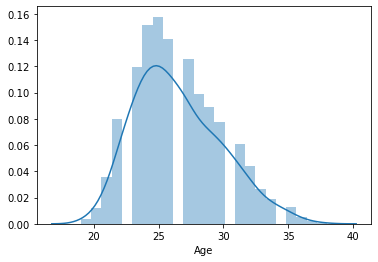

In [7]:
sns.distplot(Hitters_Data['Age'])

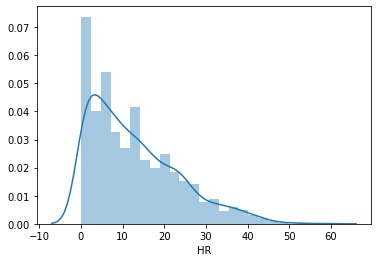

In [8]:
sns.distplot(Hitters_Data['HR'])

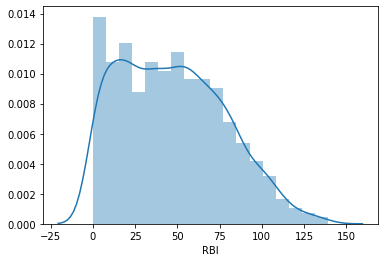

In [9]:
sns.distplot(Hitters_Data['RBI'])

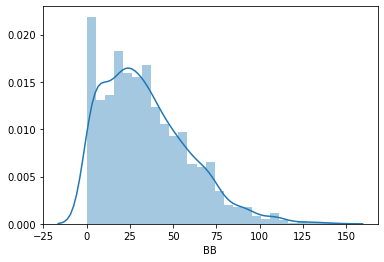

In [21]:
sns.distplot(Hitters_Data['BB'])

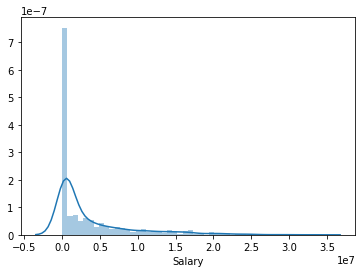

In [12]:
sns.distplot(Hitters_Data['Salary'])

Text(0, 0.5, 'Adjusted Salary')

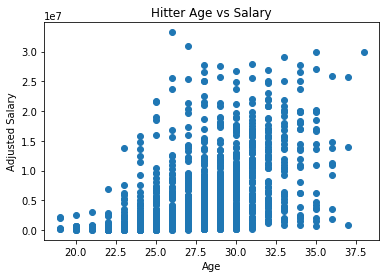

In [18]:
X = Hitters_Data['Age']
Y = Hitters_Data['Adj Salary']
plt.scatter(X, Y)
plt.title("Hitter Age vs Salary")
plt.xlabel("Age")
plt.ylabel("Adjusted Salary")

Text(0, 0.5, 'Adjusted Salary')

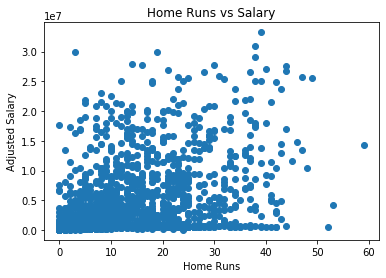

In [14]:
X = Hitters_Data['HR']
Y = Hitters_Data['Adj Salary']
plt.scatter(X, Y)
plt.title("Home Runs vs Salary")
plt.xlabel("Home Runs")
plt.ylabel("Adjusted Salary")

Text(0, 0.5, 'Adjusted Salary')

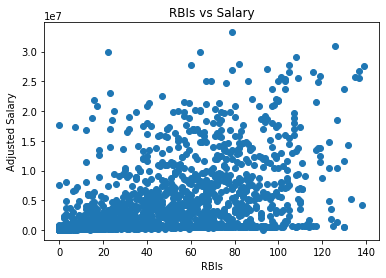

In [15]:
X = Hitters_Data['RBI']
Y = Hitters_Data['Adj Salary']
plt.scatter(X, Y)
plt.title("RBIs vs Salary")
plt.xlabel("RBIs")
plt.ylabel("Adjusted Salary")

Text(0, 0.5, 'Adjusted Salary')

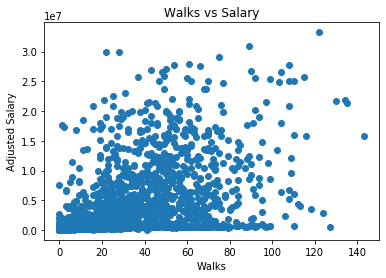

In [20]:
X = Hitters_Data['BB']
Y = Hitters_Data['Adj Salary']
plt.scatter(X, Y)
plt.title("Walks vs Salary")
plt.xlabel("Walks")
plt.ylabel("Adjusted Salary")